In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 
import matplotlib.pyplot as pl

import numpy as np
%matplotlib inline

/usr/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
N = 500
classification_problem = datasets.make_classification(n_samples=N, n_features=2, n_informative=2, 
                                                      n_classes=3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)


In [3]:
def get_meshgrid(data, step=.05, border=0.2,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def build_and_print_separating_surface(k, train_data, test_data, train_labels, test_labels):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    fig, axes = pl.subplots(figsize=(16, 6), nrows=1, ncols=2)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(classifier.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    
    for ax, data, label, title in zip(axes, [train_data, test_data], 
                                      [train_labels, test_labels], ["train", "test"]):
        predictions = classifier.predict(data)
        accuracy = metrics.accuracy_score(predictions, label)
        
        ax.pcolormesh(xx, yy, mesh_predictions, cmap=ListedColormap(['lightgreen', 'lightcoral', 'lightblue']))
        ax.scatter(data[:, 0], data[:, 1], c=label, s=100, cmap=ListedColormap(['green', 'red', 'blue']))
        ax.set_title('{}NN, {} data, accuracy={:.2f}'.format(k, title, accuracy))

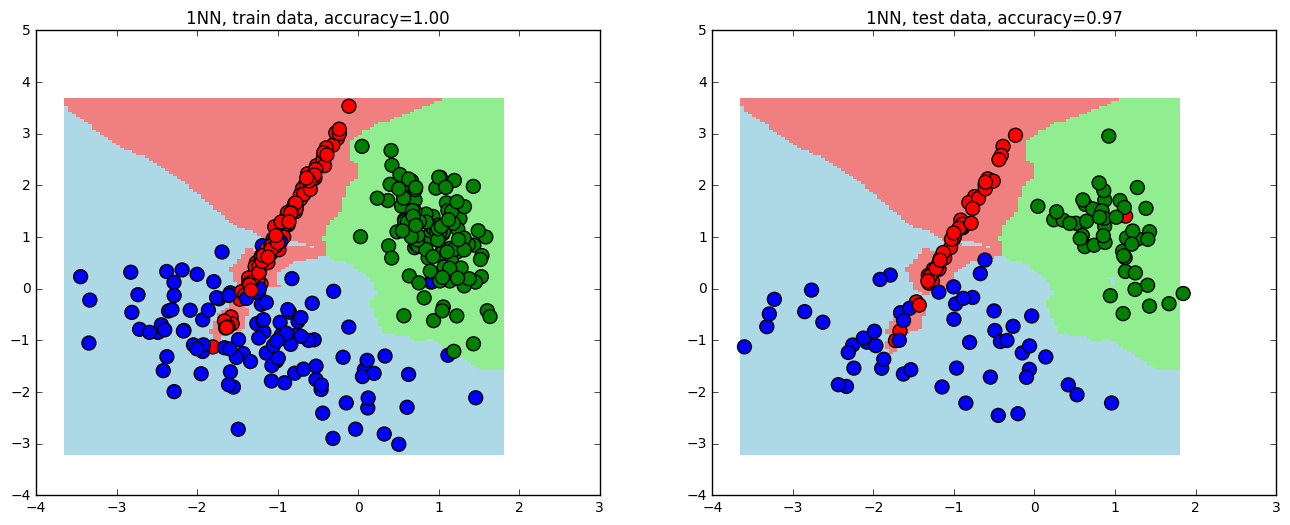

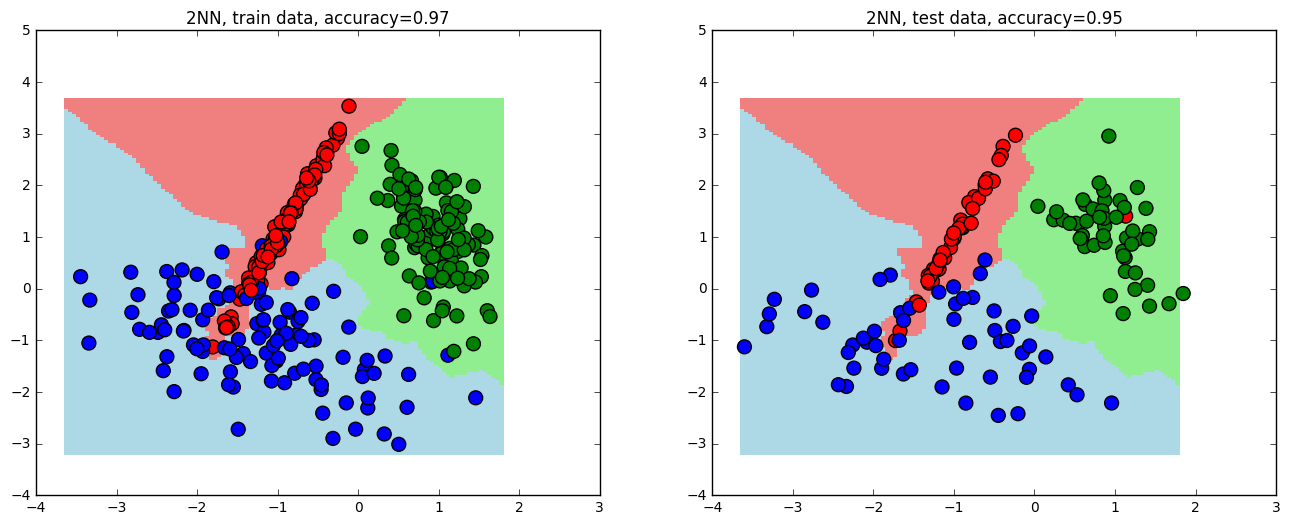

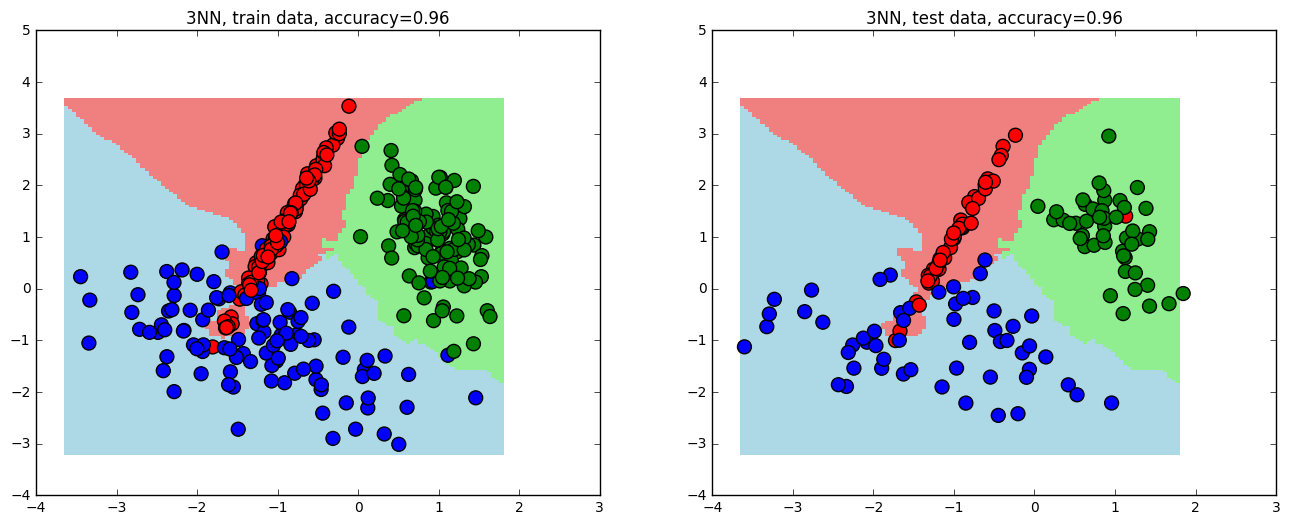

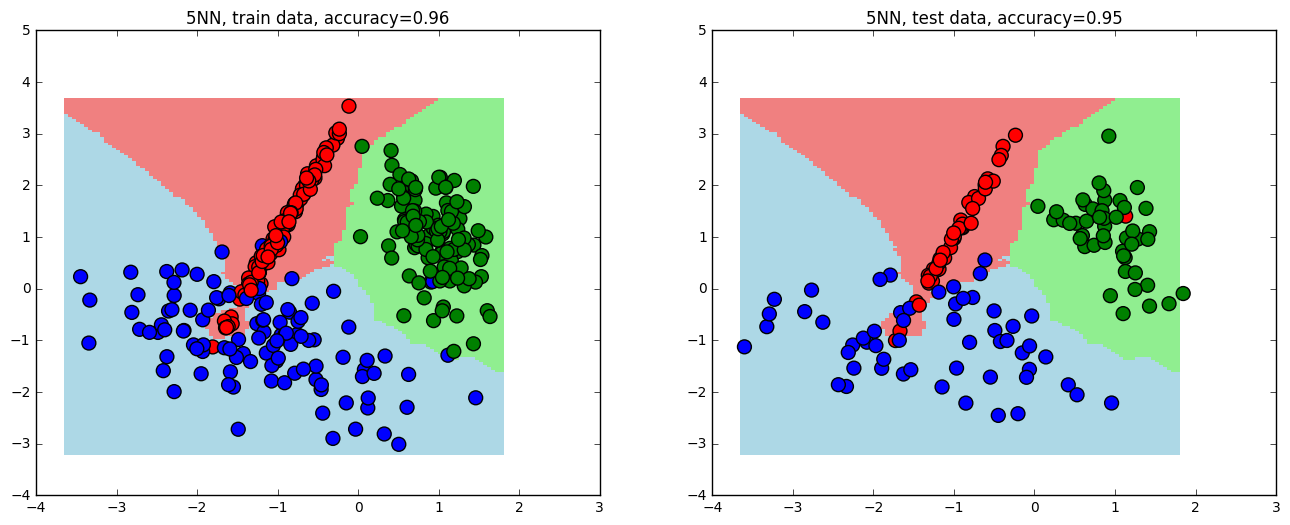

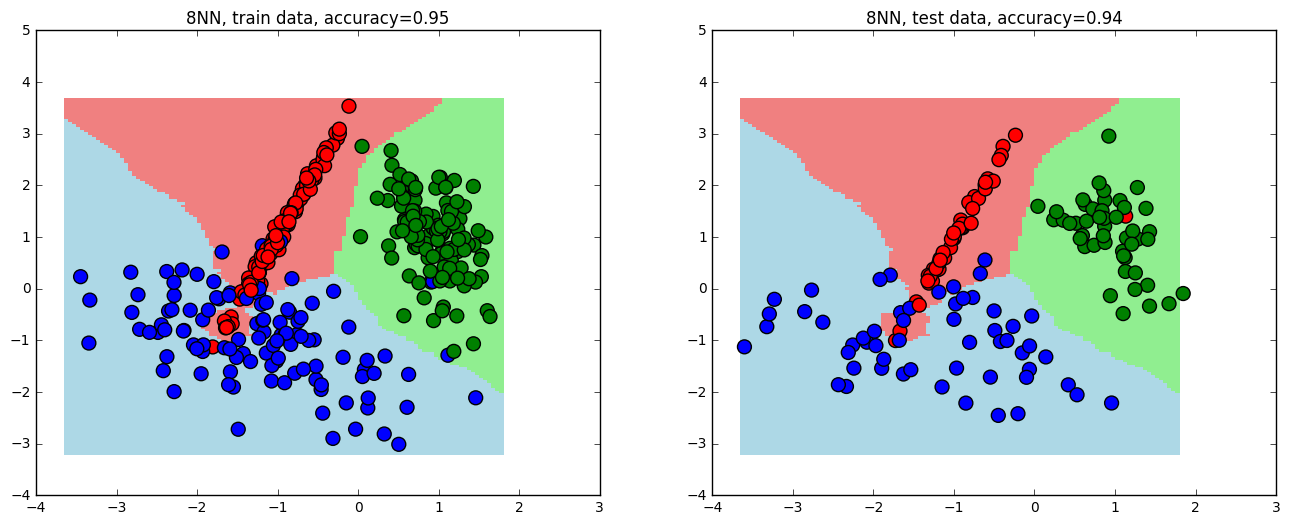

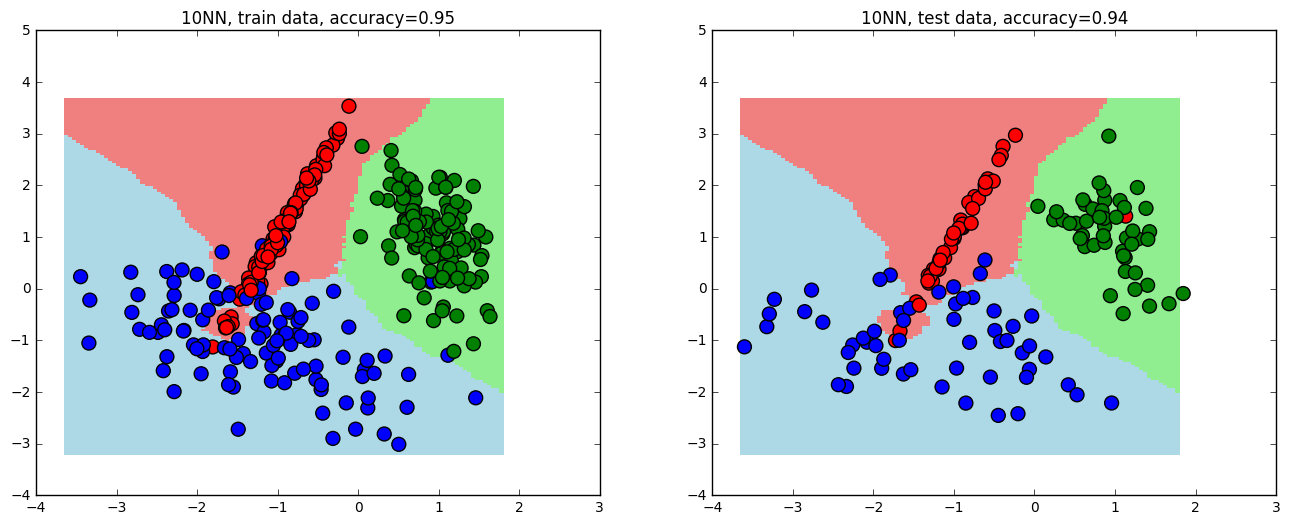

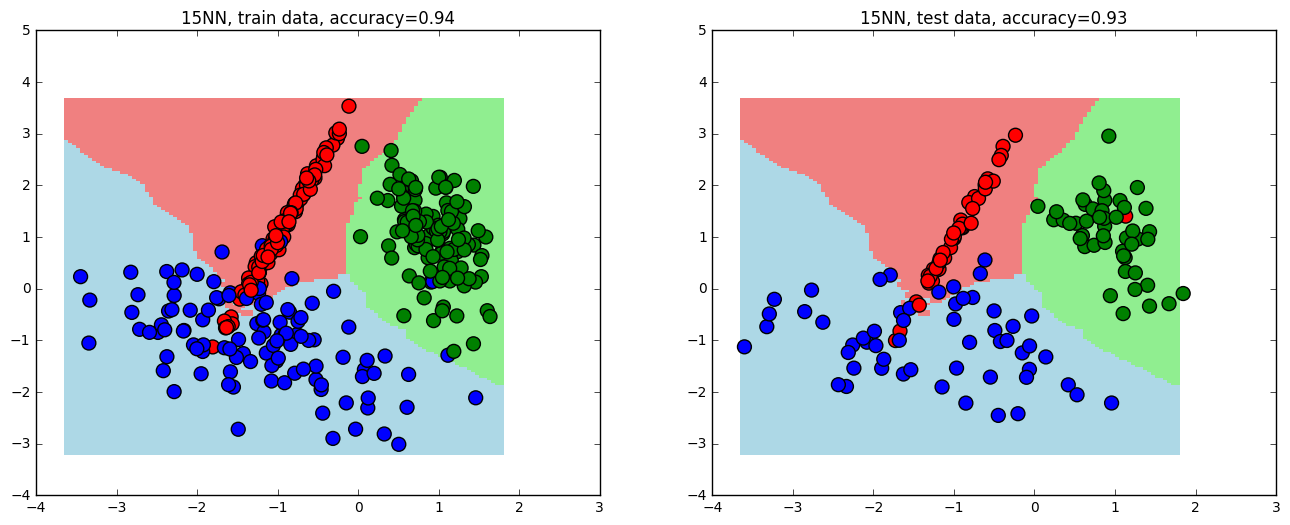

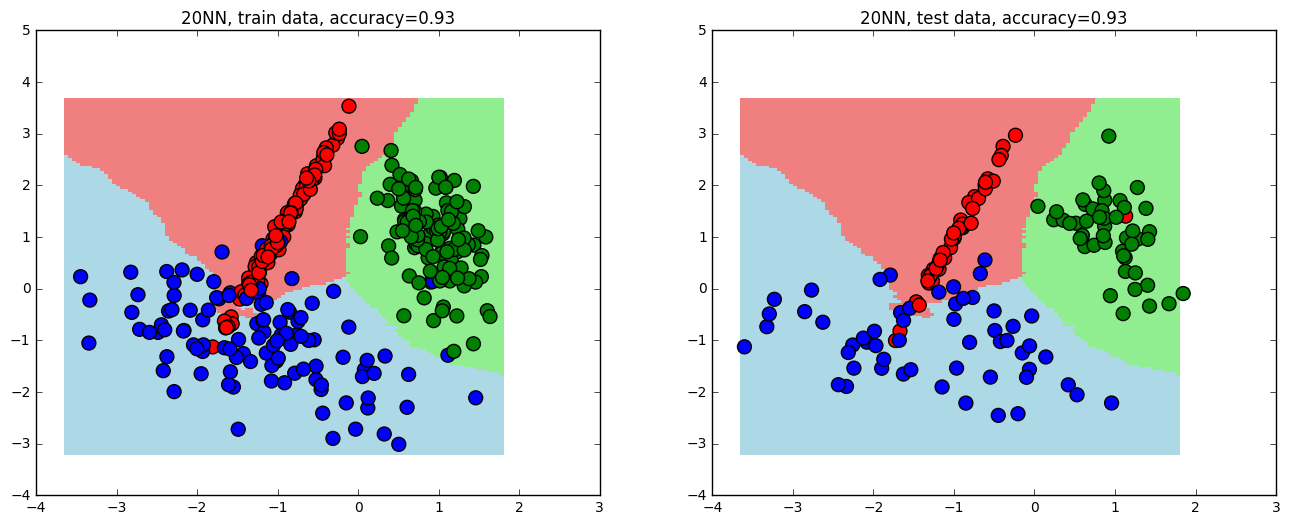

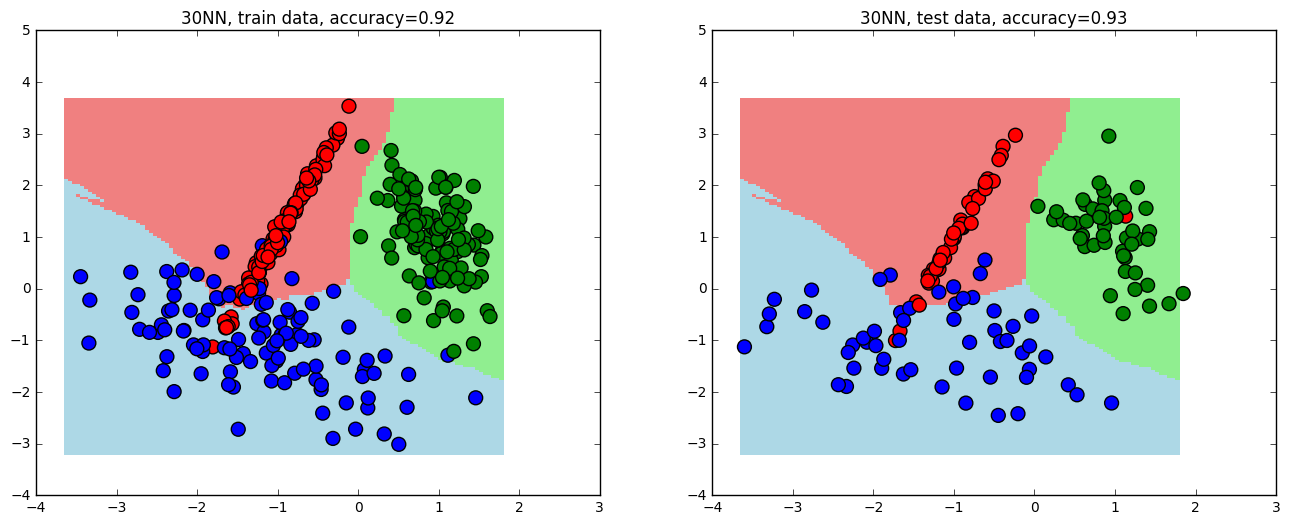

In [4]:
k_variants = [1, 2, 3, 5, 8, 10, 15, 20, 30]
for k in k_variants:
    build_and_print_separating_surface(k, train_data, test_data, train_labels, test_labels)


In [20]:
def calculate_accuracy(k, classification_problem):
    number_folds = 5
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    accuracy = 0
    for train, test in cross_validation.KFold(N, n_folds=number_folds, shuffle=True):
        classifier.fit(classification_problem[0][train], classification_problem[1][train])
        predictions = classifier.predict(classification_problem[0][test])
        accuracy += metrics.accuracy_score(predictions, classification_problem[1][test]) / number_folds
    return accuracy

Построим графики зависимости точности от $k$, причем сделаем это несколько раз, используя $KFold$ с рандомизацией разбиения $(shuffle=True)$

average k=3.3333333333333335


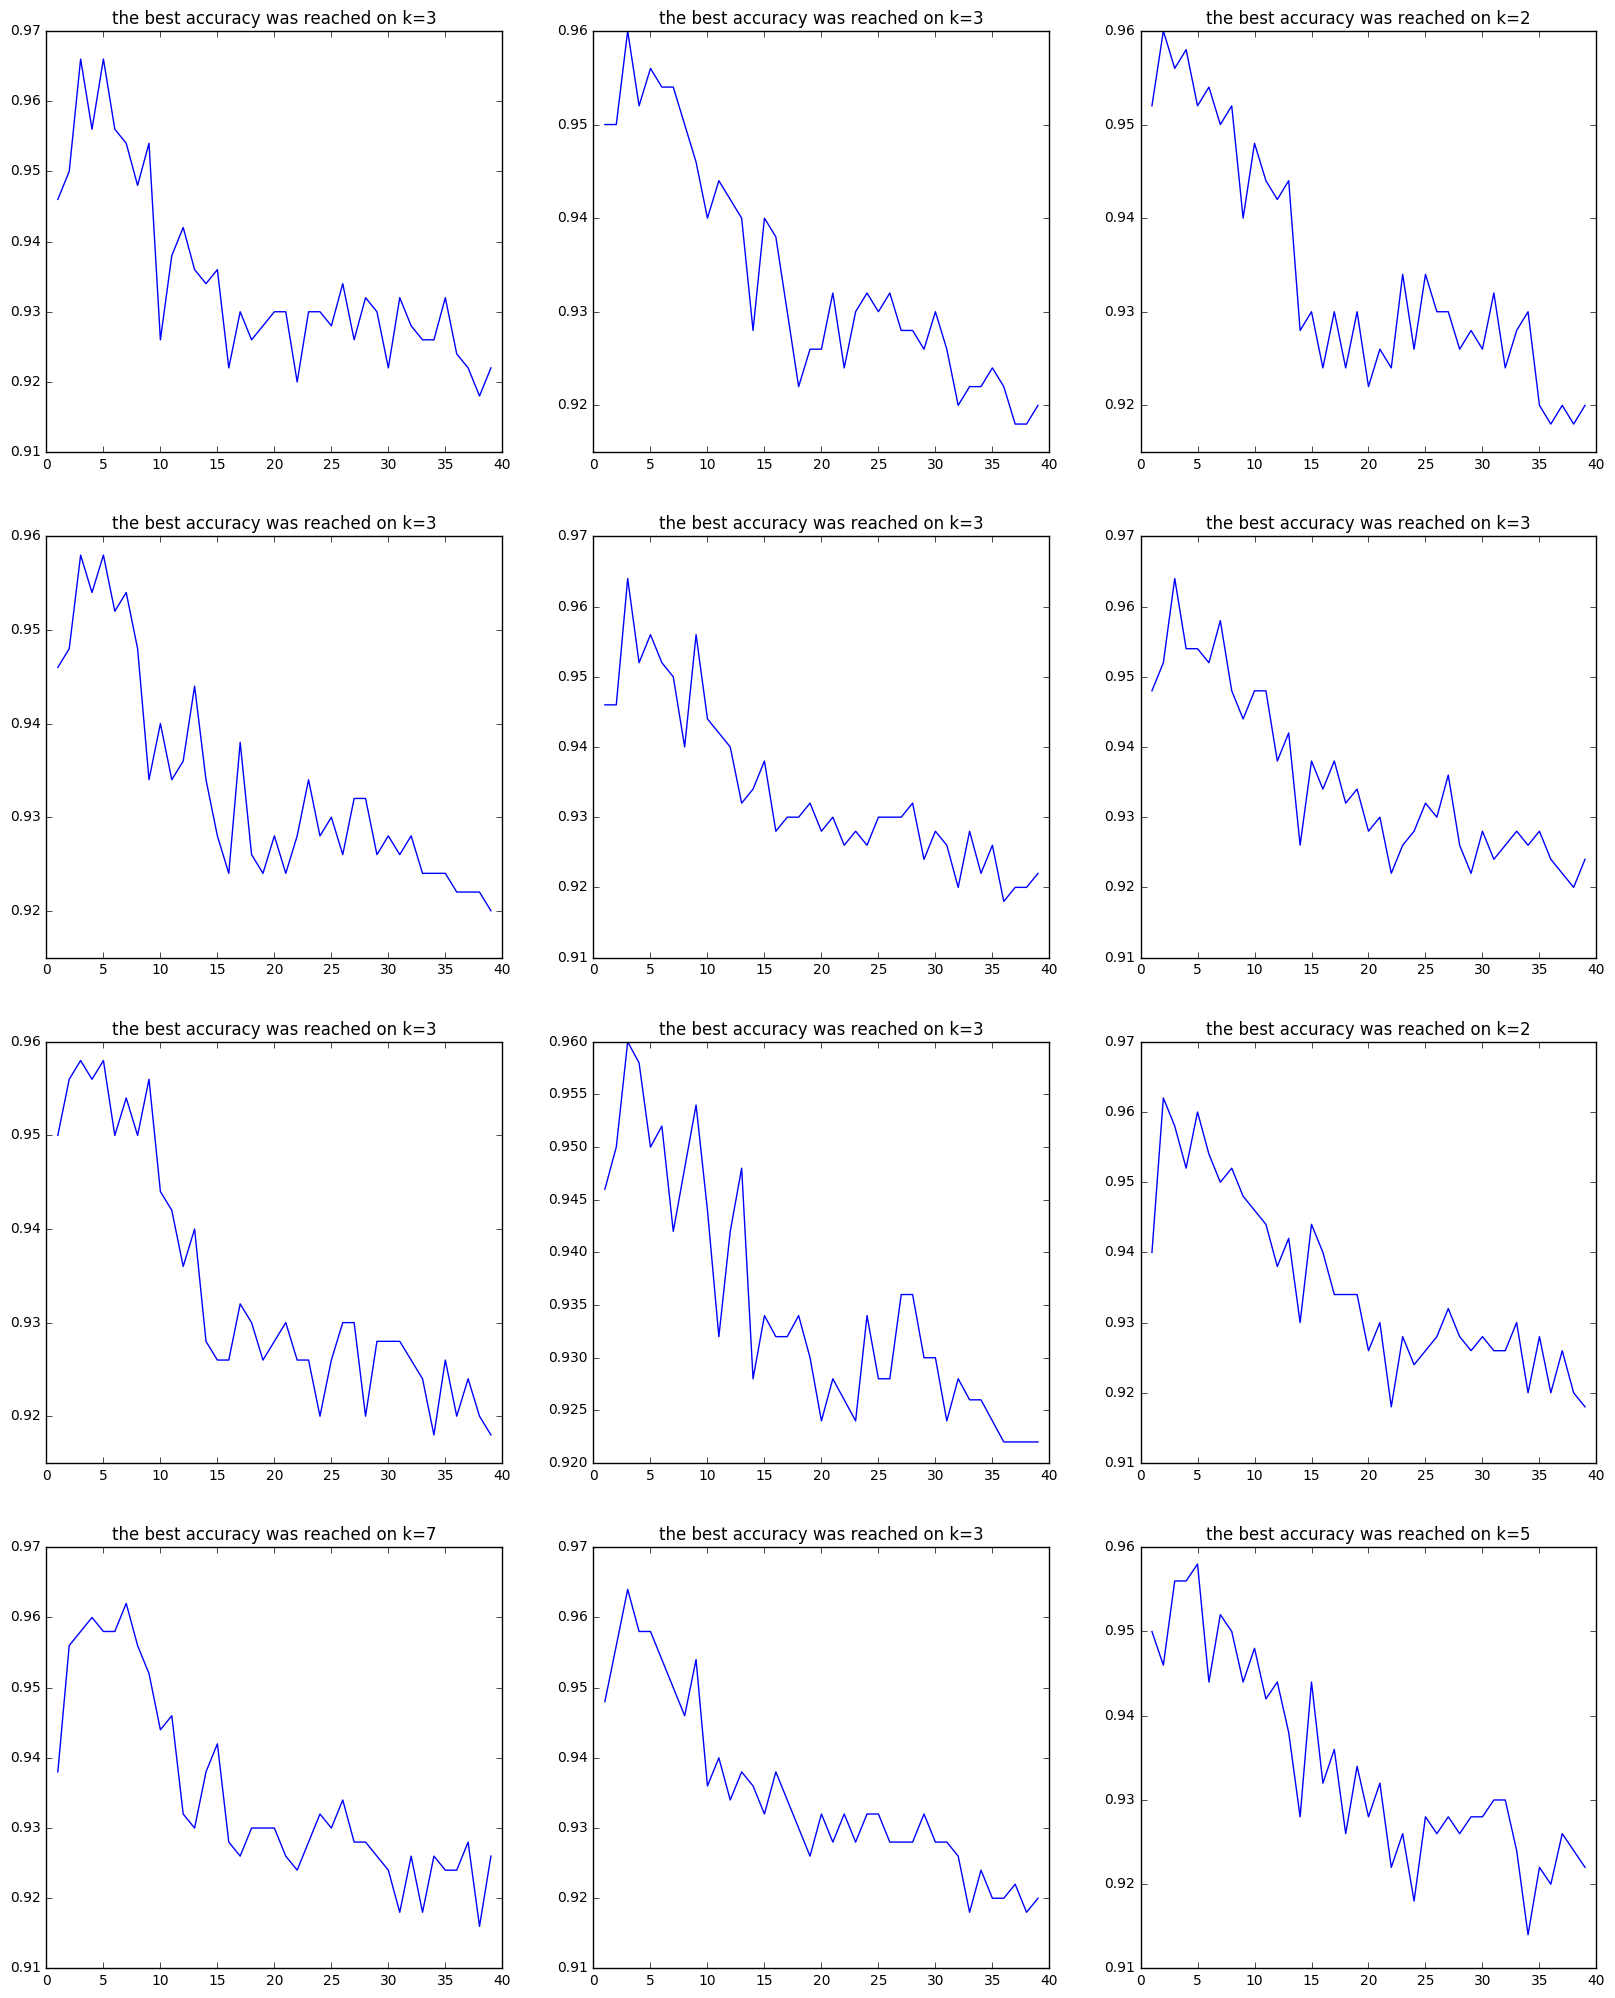

In [38]:
figure, axes = pl.subplots(figsize=(20,25), ncols=3, nrows=4)
accuracies = []

for axe in axes:
    for ax in axe:
        k_variants = range(1, 40)
        accuracy = [calculate_accuracy(k, classification_problem) for k in k_variants]
        ax.plot(k_variants, accuracy)
        ax.set_title("the best accuracy was reached on k={}".format(np.argmax(accuracy) + 1))
        accuracies.append(np.argmax(accuracy) + 1)
        
print("average k={}".format(np.mean(accuracies)))

Получаем, что как правило $k=3$. Даже в редких исключениях $k$ не превосходит $7$, то есть все значения довольно небольшие. Лучше всего брать $k=3$.